In [1]:
import pandas as pd

In [2]:
order_cl = pd.read_csv("Orders_cl.csv")
orderlines_cl = pd.read_csv("Orderlines_cl.csv")
brands_cl = pd.read_csv("brands.csv")
products_cl = pd.read_csv("Products_cl.csv")

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
orders_ql = order_cl
orderlines_ql = orderlines_cl
products_ql = products_cl

In [5]:
orders_ql['state'].value_counts()

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: count, dtype: int64

# Get the right Orders

## Set which states you need

In [6]:
orders_completed = orders_ql.loc[orders_ql['state'] == 'Completed']
orderlines_completed = orderlines_ql
products_completed = products_ql
orders_more = orders_ql.loc[orders_ql['state'].isin(['Completed', "Place Order", "Pending"])]
orderlines_more = orderlines_ql
products_more = products_ql

# Combine the Numbers (Completed)

## Sku

In [7]:
# All Sku in Products should be available in Orderlines
# All Sku in Orderlines should be available in Products

In [8]:
products_completed

,sku,name,desc,price,promo_price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,54.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,60.49
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,35.71
...,...,...,...,...,...,...,...,...
7845,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,22.99
7846,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7847,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7848,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99


In [9]:
products_completed = products_completed.loc[products_completed["sku"].isin(orderlines_completed["sku"])]

In [10]:
# We lose no rows

In [11]:
products_completed

,sku,name,desc,price,promo_price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,54.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,60.49
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,35.71
...,...,...,...,...,...,...,...,...
7845,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,22.99
7846,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7847,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7848,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99


In [12]:
products_completed['sku'].nunique() , orderlines_completed['sku'].nunique()

(7850, 7951)

In [13]:
orderlines_completed

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,34.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,429
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,699
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,79
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,29.9
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,729
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,109
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,79
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,639


Before we also correct Orderlines, we quickly save up all sku which do not exist anymore

In [14]:
delete_orders = orderlines_completed.loc[~orderlines_completed["sku"].isin(products_completed["sku"]), "id_order"].unique()

In [15]:
orderlines_completed = orderlines_completed.loc[orderlines_completed["sku"].isin(products_completed["sku"])]

In [16]:
# We lose 1418 rows

In [17]:
orderlines_completed

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,34.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,429
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,699
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,79
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,29.9
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,729
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,109
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,79
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,639


In [18]:
products_completed['sku'].nunique() , orderlines_completed['sku'].nunique()

(7850, 7850)

## Id_order/order_id

In [19]:
# All Id_order in Orderlines should be available in Orders
# All order_Id in Orders should be available in Orderlines

In [20]:
orders_completed

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,527096,2018-03-14 11:58:40,34.96,Completed


In [21]:
orders_completed = orders_completed.loc[orders_completed["order_id"].isin(orderlines_completed["id_order"])]

In [22]:
#  We lose 198 rows

In [23]:
orders_completed

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,527096,2018-03-14 11:58:40,34.96,Completed


In [24]:
orders_completed['order_id'].nunique() , orderlines_completed['id_order'].nunique()

(46407, 204213)

Reverse Time

In [25]:
orderlines_completed

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,34.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,429
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,699
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,79
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,29.9
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,729
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,109
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,79
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,639


In [26]:
orderlines_completed = orderlines_completed.loc[orderlines_completed["id_order"].isin(orders_completed["order_id"])]

In [27]:
# We lose 230 823 rows

In [28]:
orderlines_completed

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89
11,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,3209
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,3209
...,...,...,...,...,...,...,...,...
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,15.9
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,919
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,34.95
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,64.99


In [29]:
orders_completed['order_id'].nunique() , orderlines_completed['id_order'].nunique()

(46407, 46407)

In [30]:
products_completed['sku'].nunique() , orderlines_completed['sku'].nunique()

(7850, 5985)

In [31]:
products_completed

,sku,name,desc,price,promo_price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,54.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,60.49
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,35.71
...,...,...,...,...,...,...,...,...
7845,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,22.99
7846,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7847,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7848,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99


In [32]:
products_completed = products_completed.loc[products_completed["sku"].isin(orderlines_completed["sku"])]

In [33]:
# We lose 1865 rows

In [34]:
products_completed['sku'].nunique() , orderlines_completed['sku'].nunique()

(5985, 5985)

In [35]:
orders_completed['order_id'].nunique() , orderlines_completed['id_order'].nunique()

(46407, 46407)

## Delete Orders

Because the "total_paid" of Orders is not allowed to be overwritten

In [36]:
delete_orders

array([299638, 299706, 299712, ..., 491926, 510703, 515700], shape=(1388,))

In [37]:
orders_completed.loc[orders_completed["order_id"].isin(delete_orders)]

,order_id,created_date,total_paid,state
35,258985,2017-07-31 12:52:38,2264.60,Completed
102,285098,2017-07-25 22:17:09,3047.60,Completed
296,299638,2017-01-01 12:02:15,380.22,Completed
658,300029,2017-01-01 22:14:34,325.12,Completed
1813,301232,2017-01-03 01:48:40,554.97,Completed
...,...,...,...,...
178287,478679,2018-01-01 19:30:55,49.47,Completed
179390,479783,2018-01-02 15:43:09,138.99,Completed
186311,486721,2018-01-09 15:42:44,1447.80,Completed
191446,491926,2018-01-16 16:31:27,568.17,Completed


In [38]:
# 203 orders gone here

In [39]:
orders_completed = orders_completed.loc[~orders_completed["order_id"].isin(delete_orders)]

In [40]:
orderlines_completed.loc[orderlines_completed["id_order"].isin(delete_orders)]

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
119,1119318,299638,0,1,WDT0183,151.99,2017-01-01 11:56:50,3289
518,1120099,300029,0,1,SAM0073,96.89,2017-01-01 22:07:54,3409
1836,1122874,301232,0,2,WDT0183,159.99,2017-01-03 01:37:16,79.9
2345,1123962,301752,0,1,LOG0084,19.99,2017-01-03 16:15:36,24.95
2441,1124145,301854,0,1,WDT0141,112.99,2017-01-03 17:51:22,24.95
...,...,...,...,...,...,...,...,...
221236,1532829,479783,0,1,APP1215,109.00,2018-01-02 15:31:34,24.99
231583,1549989,486721,0,1,SYN0148,247.92,2018-01-09 15:47:07,3109
232996,1552431,486721,0,1,DJI0022,1114.88,2018-01-10 12:06:33,32.99
239664,1563473,491926,0,1,SEV0028,19.99,2018-01-16 10:16:09,809


In [41]:
# 335 order are gone here

In [42]:
orderlines_completed = orderlines_completed.loc[~orderlines_completed["id_order"].isin(delete_orders)]

In [43]:
orders_completed

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,527096,2018-03-14 11:58:40,34.96,Completed


In [44]:
orderlines_completed

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89
11,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,3209
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,3209
...,...,...,...,...,...,...,...,...
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,15.9
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,919
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,34.95
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,64.99


## Add total_unit_price

In [45]:
# a total unit price multiplied with quantity needs to be added to Orderlines per product as a new column
# The total unit price needs to be sumed per id_order and added to the Orders table as a new column

In [46]:
orderlines_completed["unit_price_total"] = orderlines_completed["unit_price"]*orderlines_completed["product_quantity"]

C:\Users\marle\AppData\Local\Temp\ipykernel_32052\1810582135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_completed["unit_price_total"] = orderlines_completed["unit_price"]*orderlines_completed["product_quantity"]


In [47]:
orderlines_completed

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price,unit_price_total
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89,72.19
11,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,3209,2565.99
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,3209,60.90
...,...,...,...,...,...,...,...,...,...
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,15.9,16.52
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,919,19.98
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,34.95,19.98
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,64.99,29.97


### Drop

In [48]:
orderlines_completed = orderlines_completed.drop(columns="p_price", axis=0)
orderlines_completed = orderlines_completed.drop(columns="product_id", axis=0)
products_completed = products_completed.drop(columns="promo_price", axis=0)

In [49]:
total_sum_completed = orderlines_completed.groupby("id_order")["unit_price_total"].sum()

In [50]:
orders_completed = orders_completed.merge(total_sum_completed, how="inner", left_on="order_id", right_on="id_order")

In [51]:
orders_completed

,order_id,created_date,total_paid,state,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98
...,...,...,...,...,...
46199,527042,2018-03-14 11:47:50,18.98,Completed,13.99
46200,527070,2018-03-14 11:50:48,24.97,Completed,19.98
46201,527074,2018-03-14 11:51:42,24.97,Completed,19.98
46202,527096,2018-03-14 11:58:40,34.96,Completed,29.97


In [52]:
orders_completed['difference'] = (orders_completed['total_paid'] - orders_completed['unit_price_total'])
orders_completed['difference'].describe()

count   46204.00
mean        4.25
std        24.82
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

## Discount

In [53]:
products_completed.columns

Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type', 'unit_price'], dtype='object')

In [54]:
merged_product_completed = orderlines_completed.merge(products_completed, on="sku", how="inner")\
    [["id","id_order", "product_quantity", "sku", "unit_price_x", "date", "unit_price_total", "price"]]

In [55]:
merged_product_completed["discount"] = merged_product_completed["price"] - merged_product_completed["unit_price_x"]
merged_product_completed = merged_product_completed.rename(columns={"unit_price_x":"unit_price"})

In [56]:
orderlines_completed = merged_product_completed

## Outliers

<Axes: >

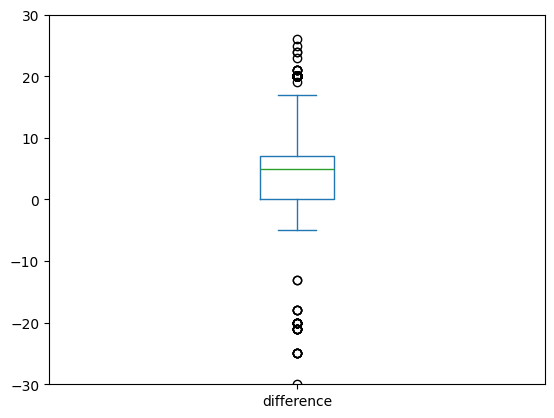

In [57]:
orders_completed['difference'].plot.box(ylim=(-30,30))

In [58]:
Q3 = orders_completed['difference'].quantile(0.75)
Q1 = orders_completed['difference'].quantile(0.25)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR

In [59]:
diff_without_outliers_completed = orders_completed[
    (orders_completed['difference'] < upper_whisker)
    &
    (orders_completed['difference'] > lower_whisker)
]

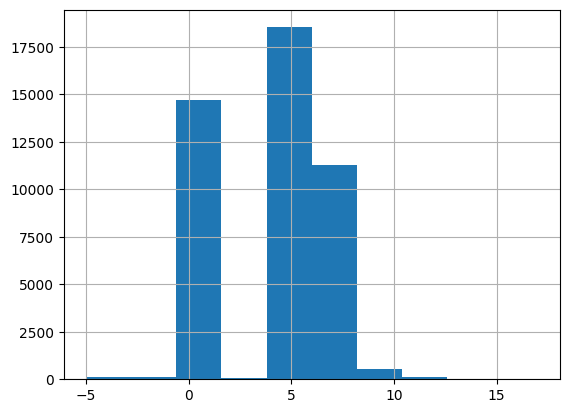

In [60]:
diff_without_outliers_completed['difference'].hist();

<Axes: >

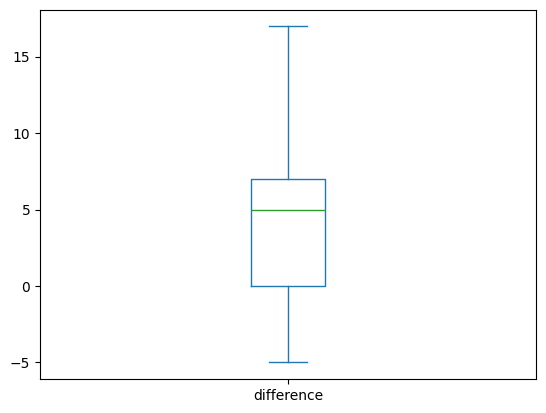

In [61]:
diff_without_outliers_completed['difference'].plot.box()

## Update all columns again

In [62]:
no_outliers_orderlines_completed = orderlines_completed.loc[orderlines_completed["id_order"].isin(diff_without_outliers_completed["order_id"])]

In [63]:
products_completed['sku'].nunique() , no_outliers_orderlines_completed['sku'].nunique()

(5985, 5936)

In [64]:
products_completed = products_completed.loc[products_completed["sku"].isin(no_outliers_orderlines_completed["sku"])]

In [65]:
products_completed['sku'].nunique() , no_outliers_orderlines_completed['sku'].nunique()

(5936, 5936)

In [66]:
diff_without_outliers_completed.to_csv("Orders_Quality_without_Outliers_C.csv", index=False)
no_outliers_orderlines_completed.to_csv("Orderlines_Quality_without_Outliers_C.csv", index=False)
products_completed.to_csv("Products_Quality_C.csv", index=False)

# Comine the Numbers (Completed, Pending, Place Order)

In [67]:
# You have to save the deleted Products through the sku and find out from which orders they came from
# From there you use the list of orders to delete them from the Orders table

## Sku

In [68]:
# All Sku in Products should be available in Orderlines
# All Sku in Orderlines should be available in Products

In [69]:
products_more

,sku,name,desc,price,promo_price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,54.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,60.49
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,35.71
...,...,...,...,...,...,...,...,...
7845,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,22.99
7846,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7847,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7848,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99


In [70]:
products_more = products_more.loc[products_more["sku"].isin(orderlines_more["sku"])]

In [71]:
# We lose no rows

In [72]:
products_more

,sku,name,desc,price,promo_price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,54.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,60.49
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,35.71
...,...,...,...,...,...,...,...,...
7845,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,22.99
7846,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7847,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7848,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99


In [73]:
products_more['sku'].nunique() , orderlines_more['sku'].nunique()

(7850, 7951)

In [74]:
orderlines_more

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,34.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,429
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,699
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,79
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,29.9
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,729
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,109
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,79
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,639


Before we also correct Orderlines, we quickly save up all sku which do not exist anymore

In [75]:
delete_orders_more = orderlines_more.loc[~orderlines_more["sku"].isin(products_more["sku"]), "id_order"].unique()

In [76]:
orderlines_more = orderlines_more.loc[orderlines_more["sku"].isin(products_more["sku"])]

In [77]:
# We lose 1418 rows

In [78]:
orderlines_more

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,34.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,429
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,699
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,79
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,29.9
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,729
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,109
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,79
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,639


In [79]:
products_more['sku'].nunique() , orderlines_more['sku'].nunique()

(7850, 7850)

## Id_order/order_id

In [80]:
# All Id_order in Orderlines should be available in Orders
# All order_Id in Orders should be available in Orderlines

In [81]:
orders_more

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226899,527392,2018-03-14 13:55:11,34.99,Pending
226901,527394,2018-03-14 13:55:15,161.00,Place Order
226903,527396,2018-03-14 13:55:44,141.58,Place Order
226904,527397,2018-03-14 13:56:38,42.99,Place Order


In [82]:
orders_more = orders_more.loc[orders_more["order_id"].isin(orderlines_more["id_order"])]

In [83]:
#  We lose 12 634 rows

In [84]:
orders_more

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226899,527392,2018-03-14 13:55:11,34.99,Pending
226901,527394,2018-03-14 13:55:15,161.00,Place Order
226903,527396,2018-03-14 13:55:44,141.58,Place Order
226904,527397,2018-03-14 13:56:38,42.99,Place Order


In [85]:
orders_more['order_id'].nunique() , orderlines_more['id_order'].nunique()

(89233, 204213)

Reverse Time

In [86]:
orderlines_more

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,34.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,429
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,699
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,79
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,29.9
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,729
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,109
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,79
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,639


In [87]:
orderlines_more = orderlines_more.loc[orderlines_more["id_order"].isin(orders_more["order_id"])]

In [88]:
# We lose 17 7854 rows

In [89]:
orderlines_more

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,60.99
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,22.95
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,89
11,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,3209
15,1119131,299553,0,1,APP1854,3278.99,2017-01-01 02:14:47,3209
...,...,...,...,...,...,...,...,...
293973,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15,109.99
293975,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44,40
293976,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02,99.99
293977,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,49.99


In [90]:
orders_more["order_id"].nunique() , orderlines_more["id_order"].nunique()

(89233, 89233)

In [91]:
products_more["sku"].nunique() , orderlines_more["sku"].nunique()

(7850, 6899)

In [92]:
products_more

,sku,name,desc,price,promo_price,in_stock,type,unit_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,54.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,60.49
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,35.71
...,...,...,...,...,...,...,...,...
7845,MMW0012,"My MW Case MacBook Pro 13 ""(Late 2016) Blue Sa...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,0,13835403,22.99
7846,MMW0013,"My MW Case MacBook Pro 13 ""(Late 2016) White S...",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7847,MMW0016,"My MW Case MacBook Pro 13 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99
7848,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,20.99,1,13835403,22.99


In [93]:
products_more = products_more.loc[products_more["sku"].isin(orderlines_more["sku"])]

In [94]:
# We lose 951 rows

In [95]:
products_more['sku'].nunique() , orderlines_more['sku'].nunique()

(6899, 6899)

In [96]:
orders_more['order_id'].nunique() , orderlines_more['id_order'].nunique()

(89233, 89233)

## Delete Orders

Because the "total_paid" of Orders is not allowed to be overwritten

In [97]:
# You have to save the deleted Products through the sku and find out from which orders they came from
# From there you use the list of orders to delete them from the Orders table

In [98]:
delete_orders_more

array([299638, 299706, 299712, ..., 491926, 510703, 515700], shape=(1388,))

In [99]:
orders_more.loc[orders_more["order_id"].isin(delete_orders)]

,order_id,created_date,total_paid,state
35,258985,2017-07-31 12:52:38,2264.60,Completed
102,285098,2017-07-25 22:17:09,3047.60,Completed
296,299638,2017-01-01 12:02:15,380.22,Completed
658,300029,2017-01-01 22:14:34,325.12,Completed
1813,301232,2017-01-03 01:48:40,554.97,Completed
...,...,...,...,...
186311,486721,2018-01-09 15:42:44,1447.80,Completed
191446,491926,2018-01-16 16:31:27,568.17,Completed
193046,493528,2018-01-18 12:48:14,506.09,Completed
210212,510703,2018-02-13 13:55:42,383.84,Pending


In [100]:
# 274 rows were removed

In [101]:
orders_more = orders_more.loc[~orders_more["order_id"].isin(delete_orders)]

In [102]:
orderlines_more.loc[orderlines_more["id_order"].isin(delete_orders)]

,id,id_order,product_id,product_quantity,sku,unit_price,date,p_price
119,1119318,299638,0,1,WDT0183,151.99,2017-01-01 11:56:50,3289
518,1120099,300029,0,1,SAM0073,96.89,2017-01-01 22:07:54,3409
1836,1122874,301232,0,2,WDT0183,159.99,2017-01-03 01:37:16,79.9
2345,1123962,301752,0,1,LOG0084,19.99,2017-01-03 16:15:36,24.95
2441,1124145,301854,0,1,WDT0141,112.99,2017-01-03 17:51:22,24.95
...,...,...,...,...,...,...,...,...
273119,1617040,510703,0,1,NTE0013,16.52,2018-02-16 17:09:32,399
273120,1617042,510703,0,1,OWC0110,41.31,2018-02-16 17:10:21,59.95
273121,1617045,510703,0,1,CRU0062,206.87,2018-02-16 17:11:38,399
273123,1617052,510703,0,1,SEV0041,82.64,2018-02-16 17:16:05,134.99


In [103]:
# 454 rows were removed

In [104]:
orderlines_more = orderlines_more.loc[~orderlines_more["id_order"].isin(delete_orders)]

## Add total_unit_price

In [105]:
# a total unit price multiplied with quantity needs to be added to Orderlines per product as a new column
# The total unit price needs to be sumed per id_order and added to the Orders table as a new column

In [106]:
orderlines_more["unit_price_total"] = orderlines_more["unit_price"]*orderlines_more["product_quantity"]

C:\Users\marle\AppData\Local\Temp\ipykernel_32052\837772943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_more["unit_price_total"] = orderlines_more["unit_price"]*orderlines_more["product_quantity"]


In [107]:
orderlines_more = orderlines_more.drop(columns="p_price", axis=0)
orderlines__more = orderlines_more.drop(columns="product_id", axis=0)
products_more = products_more.drop(columns="promo_price", axis=0)

In [108]:
total_sum = orderlines_more.groupby("id_order")["unit_price_total"].sum()

In [109]:
orders_more = orders_more.merge(total_sum, how="inner", left_on="order_id", right_on="id_order")

In [110]:
orders_more

,order_id,created_date,total_paid,state,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98
...,...,...,...,...,...
88954,527392,2018-03-14 13:55:11,34.99,Pending,34.99
88955,527394,2018-03-14 13:55:15,161.00,Place Order,161.00
88956,527396,2018-03-14 13:55:44,141.58,Place Order,141.58
88957,527397,2018-03-14 13:56:38,42.99,Place Order,42.99


In [111]:
orders_more['difference'] = (orders_more['total_paid'] - orders_more['unit_price_total'])
orders_more['difference'].describe()

count   88959.00
mean        3.14
std        18.10
min      -165.00
25%         0.00
50%         0.01
75%         4.99
max      3984.99
Name: difference, dtype: float64

## Discount

In [112]:
products_more.columns

Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type', 'unit_price'], dtype='object')

In [113]:
merged_product_more = orderlines_more.merge(products_more, on="sku", how="inner")\
    [["id","id_order", "product_quantity", "sku", "unit_price_x", "date", "unit_price_total", "price"]]

In [114]:
merged_product_more["discount"] = merged_product_more["price"] - merged_product_more["unit_price_x"]
merged_product_more = merged_product_more.rename(columns={"unit_price_x":"unit_price"})
merged_product_more = merged_product_more.drop(columns="price")

In [115]:
orderlines_more = merged_product_more

In [116]:
orderlines_more

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,discount
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,16.81
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,643.01
4,1119131,299553,1,APP1854,3278.99,2017-01-01 02:14:47,3278.99,0.01
...,...,...,...,...,...,...,...,...
114252,1650193,527394,1,APP1922,161.00,2018-03-14 13:55:15,161.00,18.00
114253,1650195,527396,1,PAC0653,141.58,2018-03-14 13:55:44,141.58,74.40
114254,1650196,527384,1,LAC0227,249.99,2018-03-14 13:56:02,249.99,50.00
114255,1650198,527397,1,JBL0122,42.99,2018-03-14 13:56:38,42.99,6.96


## Outliers

<Axes: >

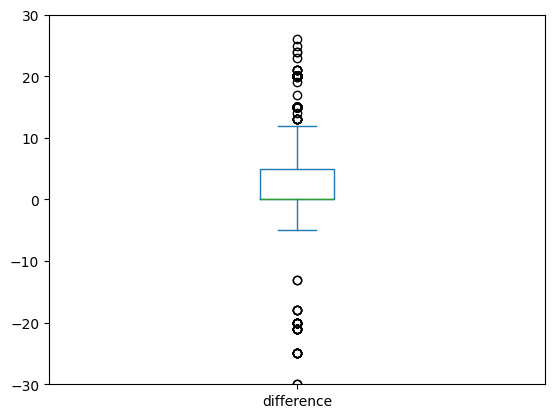

In [117]:
orders_more['difference'].plot.box(ylim=(-30,30))

In [118]:
Q3 = orders_more['difference'].quantile(0.75)
Q1 = orders_more['difference'].quantile(0.25)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR

In [119]:
diff_without_outliers_more = orders_more[
    (orders_more['difference'] < upper_whisker)
    &
    (orders_more['difference'] > lower_whisker)
]

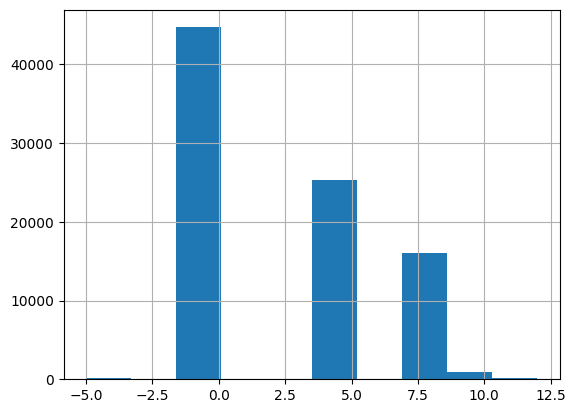

In [120]:
diff_without_outliers_more['difference'].hist();

<Axes: >

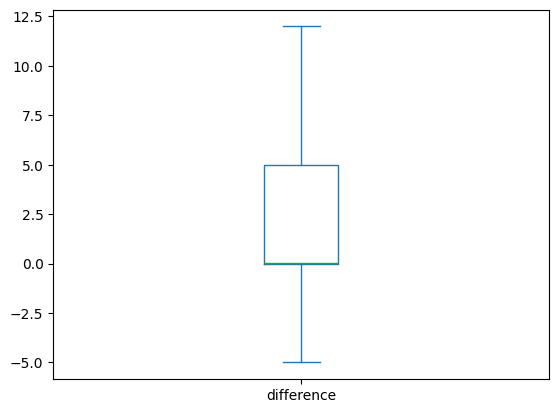

In [121]:
diff_without_outliers_more['difference'].plot.box()

## Update all columns again

In [122]:
no_outliers_orderlines_more = orderlines_more.loc[orderlines_more["id_order"].isin(diff_without_outliers_more["order_id"])]

In [123]:
diff_without_outliers_more["order_id"].nunique(), no_outliers_orderlines_more["id_order"].nunique()

(87487, 87487)

In [124]:
products_more['sku'].nunique() , no_outliers_orderlines_more['sku'].nunique()

(6899, 6867)

In [125]:
products_more = products_more.loc[products_more["sku"].isin(no_outliers_orderlines_more["sku"])]

In [126]:
products_more['sku'].nunique() , no_outliers_orderlines_more['sku'].nunique()

(6867, 6867)

In [127]:
diff_without_outliers_more.to_csv("Orders_Quality_without_Outliers_M.csv", index=False)
no_outliers_orderlines_more.to_csv("Orderlines_Quality_without_Outliers_M.csv", index=False)
products_more.to_csv("Products_Quality_M.csv", index=False)